In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [21]:
df = pd.read_csv('data/purchase/purchase-train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 602 entries, ID to class
dtypes: int64(602)
memory usage: 45.9 MB


In [22]:
df.head()

,ID,0,1,2,3,4,5,6,7,8,...,591,592,593,594,595,596,597,598,599,class
0,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,86
1,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,81
2,2,0,1,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,3
3,3,0,1,0,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,19
4,4,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,76


In [23]:
df.isnull().sum().sum()

0

In [24]:
X_train = df.loc[:, df.columns != 'class']
y_train = df['class']

X_test = pd.read_csv('data/purchase/purchase-xtest.csv')
y_test = pd.read_csv('data/purchase/purchase-ytest.csv')['class']

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

Accuracy: 0.0136
0.27 accuracy with a standard deviation of 0.00
-------------
fit_time  mean  4.4083868026733395
fit_time  std  0.0061892351109664465
score_time  mean  0.13041224479675292
score_time  std  0.014085499973498429
test_score  mean  0.265
test_score  std  0.0026267851073127416
-------------
10
40
70
100
130
160
190
220
250
280
310
340
370
400
430
460
490


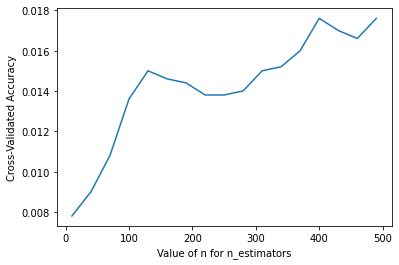

In [27]:
# random forest classifier

#not scaled
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))


#CV not scaled
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('-------------')
#CV scaled
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', RandomForestClassifier(n_estimators=100, random_state=100)) #step2 - classifier
])
scores = cross_validate(pipeline, X_train, y_train)
for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())
            
## Hyper parameter tuning
print('-------------')
n_range = range(10,500,30)
n_scores = []
n_loss_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for n in n_range:
    print(str(n))
    pipeline.set_params(clf__n_estimators=n)
    pipeline.fit(X_train,y_train)
    predictions = pipeline.predict(X_test)
    score = accuracy_score(y_test, predictions)
    n_scores.append(score)
# plot to see clearly
plt.plot(n_range, n_scores)
plt.xlabel('Value of n for n_estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



In [ ]:
## neural network MLPClassifier

#not scaled
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))

#CV not scaled
scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print('-------------')
pipeline.set_params(clf = mlp)
scores = cross_validate(pipeline, X_train, y_train)
for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())
